In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Audio**

**y = Ax**

y = matriks kompresi CS

**x** = sinyal audio (nada) dengan ukuran matrix Nx1

**A** = matriks kompresi, diambil random dengan ukuran matriks MxN (M<N)

In [ ]:
import numpy as np
# from scipy.io import wavfile
import soundfile as sf
from IPython.display import Audio

audio = f'/content/drive/MyDrive/S1/DATASET_SHINTA/Re/Re 9.wav'
nada, fs = sf.read(audio, start=0, stop=63000)
#, start=0, stop=62000
print('Ukuran Matriks x (Nx1) : {}'.format(nada.shape))

Ukuran Matriks x (Nx1) : (63000,)


In [ ]:
durasi = len(nada)/fs         # detik
samples = int(fs*durasi)      # fs x durasi

n = samples                      # L
x = nada[:n]

x.shape

(63000,)

# **DCT**

In [ ]:
from scipy.fftpack import dct, idct

x1 = dct(x, norm='ortho')
x1.shape

(63000,)

# **Matriks A**

terdiri dari elemen a(i,j) dengan i dan j bilangan asli yang diperoleh dari **distribusi normal (Normal Random Matrix)**

In [ ]:
from scipy.stats import norm

m = 6300

A = 2*(np.random.rand(m, x.shape[0]))-1   # random antara -1 dan 1
A = A/(np.max(np.max(np.absolute(A))))
#A = A/np.amax(np.amax(np.abs(A)))
A = A/np.linalg.norm(A)

A.shape

(6300, 63000)

# **Akuisisi Compressive Sensing**

In [ ]:
y = A @ x1

In [ ]:
y.shape

(6300,)

# **OMP**

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP
import matplotlib.pyplot as plt

omp = OMP(n_nonzero_coefs=150, normalize=False)
omp.fit(A,y)
recon = omp.coef_

In [ ]:
Xhat = idct(recon, norm='ortho')
#Xhat = idct(coef)
Xhat.shape

(63000,)

In [ ]:
audio = Xhat[:samples]
audio.shape

(63000,)


# **Evaluasi Rekonstruksi**

## Rasio Kompresi

In [ ]:
rasiok = (len(y)/len(x))*100
print('Rasio Kompresi : {:.3f}%'.format(rasiok))

Rasio Kompresi : 10.000%


## SNR

In [ ]:
import math as mt

Px = np.mean(x**2)          # original
Pxhat = np.mean(Xhat**2)    # processed

error = Pxhat-Px
se = np.sum(np.multiply(error, error))

#mse = np.mean(np.multiply(error, 2))

Px2 = np.sum(np.power(Px, 2))
SNR = Px2/se
SNR_db = 10*mt.log10(SNR)

print('SNR = {:.2f}'.format(SNR))
print('SNR (dB) = {:.2f} dB'.format(SNR_db))
#print('MSE : {}'.format(mse))

SNR = 55.99
SNR (dB) = 17.48 dB


# **Plot Hasil**

## Domain Waktu

In [ ]:
t = np.linspace(0, durasi, len(x))
#t = np.linspace(0, durasi, samples)

print('Frequency Sampling : {} Hz'.format(fs))
print('Banyak Samples dalam {:.2f} detik : {} Samples'.format(durasi,samples))

t.shape

Frequency Sampling : 48000 Hz
Banyak Samples dalam 1.31 detik : 63000 Samples


(63000,)

Text(0.5, 1.0, 'Sinyal Asli di Domain Waktu')

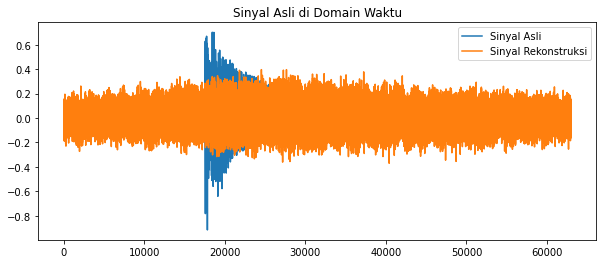

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import plot, show, figure, title

figure(figsize=[10, 4])
plot(x)
plot(Xhat)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Asli di Domain Waktu")
#plt.xlabel('Time (s)')
#plt.ylabel('X(t)')

#figure(figsize=[10, 4])
#plot(t, Xhat)
#title("Sinyal Rekonstruksi di Domain Waktu")
#plt.xlabel('Time (s)')
#plt.ylabel('X(t)')

## Domain Frekuensi

Text(0.5, 1.0, 'Sinyal Rekonstruksi di Domain Frekuensi')

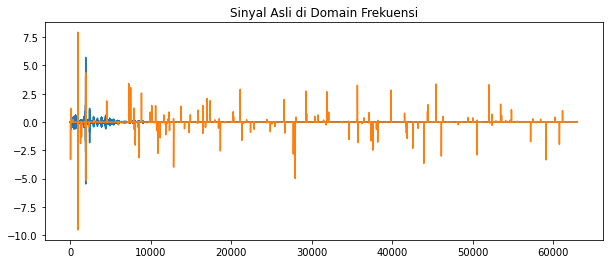

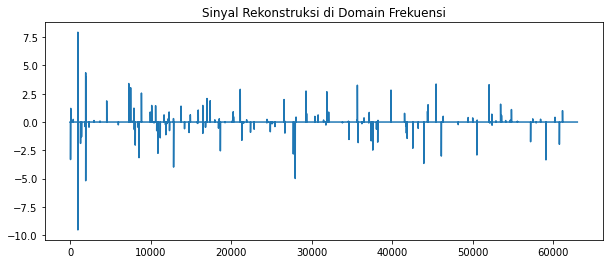

In [ ]:
figure(figsize=[10, 4])
plot(x1)
plot(recon)
#plot(coef)
title("Sinyal Asli di Domain Frekuensi")
#plt.xlabel('Freq (Hz)')
#plt.ylabel('X(f)')

figure(figsize=[10, 4])

#plot(coef)
plot(recon)
title("Sinyal Rekonstruksi di Domain Frekuensi")
#plt.xlabel('Freq (Hz)')
#plt.ylabel('X(f)')

# **Test Audio**

In [ ]:
rekon = sf.write('Do Rekon.wav', Xhat, fs)

In [ ]:
from IPython.display import Audio
import librosa.display

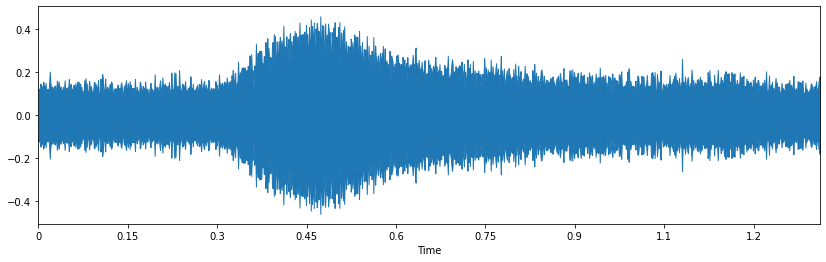

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=Xhat, sr=fs)
Audio('Do Rekon.wav')

# **Kebutuhan BAB 4**

In [ ]:
import pandas as pd

nada_df = pd.read_csv("/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/nada_df.csv")
nada_df.head()

,Nada,Path,Nama
0,Do,/content/drive/MyDrive/S1/DATASET_SHINTA/Do/Do...,Do 2
1,Do,/content/drive/MyDrive/S1/DATASET_SHINTA/Do/Do...,Do 6
2,Do,/content/drive/MyDrive/S1/DATASET_SHINTA/Do/Do...,Do 3
3,Do,/content/drive/MyDrive/S1/DATASET_SHINTA/Do/Do...,Do 4
4,Do,/content/drive/MyDrive/S1/DATASET_SHINTA/Do/Do...,Do 9


In [ ]:
import numpy as np
import soundfile as sf
import librosa

# taking any example and checking for thechniques
do = np.array(nada_df.Path)[1]
re = np.array(nada_df.Path)[22]
mi = np.array(nada_df.Path)[62]
fa = np.array(nada_df.Path)[42]
so = np.array(nada_df.Path)[85]
la = np.array(nada_df.Path)[102]
si = np.array(nada_df.Path)[122]

do, fs_do = sf.read(do, start=0, stop=63000)
re, fs_re = sf.read(re, start=0, stop=63000)
mi, fs_mi = sf.read(mi, start=0, stop=63000)
fa, fs_fa = sf.read(fa, start=0, stop=63000)
so, fs_so = sf.read(so, start=0, stop=63000)
la, fs_la = sf.read(la, start=0, stop=63000)
si, fs_si = sf.read(si, start=0, stop=63000)


# CS Function

In [ ]:
from scipy.fftpack import dct, idct
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP

def cs_omp(x):
  #x, fs = sf.read(path, start=0, stop=63000)

  #durasi = len(nada)/fs         # detik
  #samples = int(fs*durasi)      # fs x durasi
  #n = 3000
  #x = nada[:n]

  x1 = dct(x, norm='ortho')

  m = 6300
  A = 2*(np.random.randn(m, x.shape[0]))-1
  A = A/(np.max(np.max(np.absolute(A))))       # normalisasi pake norm 1
  A = A/(np.linalg.norm(A, axis=0))            # normalisasi pake norm 2

  y = A @ x1

  omp = OMP(n_nonzero_coefs = 150, normalize=False)
  omp.fit(A,y)
  recon = omp.coef_

  xhat = idct(recon, norm='ortho')

  return xhat

In [ ]:
DO = cs_omp(do)
RE = cs_omp(re)
MI = cs_omp(mi)
FA = cs_omp(fa)
SO = cs_omp(so)
LA = cs_omp(la)
SI = cs_omp(si)

# PLOT

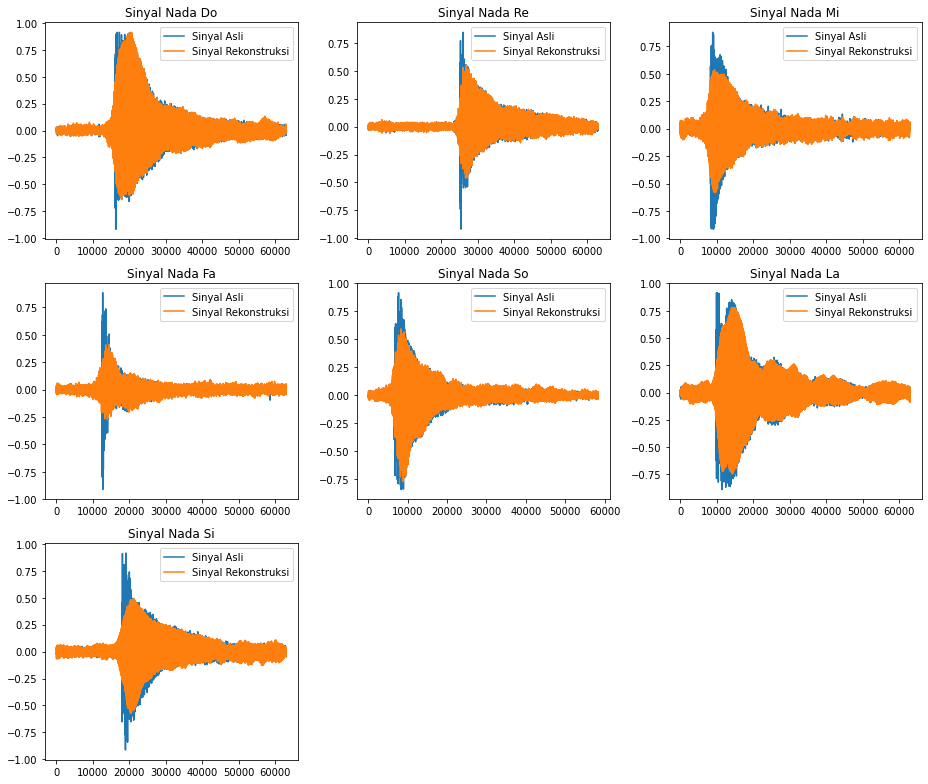

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, figure, title
import librosa.display

plt.figure(figsize=(13,11))

plt.subplot(3, 3, 1)
plt.title('nada Do')
plot(do)
plot(DO)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada Do")
plt.tight_layout()

plt.subplot(3, 3, 2)
plt.title('nada Re')
plot(re)
plot(RE)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada Re")
plt.tight_layout()

plt.subplot(3, 3, 3)
plt.title('nada Mi')
plot(mi)
plot(MI)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada Mi")
plt.tight_layout()

plt.subplot(3, 3, 4)
plt.title('nada Fa')
plot(fa)
plot(FA)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada Fa")
plt.tight_layout()

plt.subplot(3, 3, 5)
plt.title('nada So')
plot(so)
plot(SO)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada So")
plt.tight_layout()

plt.subplot(3, 3, 6)
plt.title('nada La')
plot(la)
plot(LA)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada La")
plt.tight_layout()

plt.subplot(3, 3, 7)
plt.title('nada Si')
plot(si)
plot(SI)
plt.legend(['Sinyal Asli', 'Sinyal Rekonstruksi'])
title("Sinyal Nada Si")
plt.tight_layout()